# **🙍‍♂️ / 🙍‍♀️ F.I.SH:**Anvarbek Bo'riyev

# **🏫 Guruh:**59/24

# **📞 Telefon nomer:** ____________________________





# **📊 Sun'iy intellekt asoslari: Oddiy refleks agent yaratish.**

### ***Talabalar uchun yo‘riqnoma va tavsiyalar***
Ushbu  vazifa qidirish algoritmlari (state space search) tushunchasini Python orqali mustahkamlashga qaratilgan. Siz berilgan muhitda (graf) start → goal yo‘lini topasiz va algoritm qanday ishlashini ko‘rsatasiz.

#**----------------------------------------------------------------------------**
# **🛠 Vazifani bajarish bosqichlari**
### **Muhitni sozlash**

### Vazifani bajarish uchun sizga **Google Colab** yoki **Jupyter Notebook** tavsiya etiladi.


*   .ipynb faylini yuklab oling va o'z muhitingizga yuklang.
*   Kodni ishga tushirishdan oldin kerakli kutubxonalarni import qiling.

### Kerakli kutubxonalar (minimum):

* <code>collections.deque</code> :(BFS uchun majburiy)

* <code>heapq</code>  Dijkstra/A* algoritmlari uchun

* <code>time</code> (ixtiyoriy, simulyatsiya pauzasi)

* <code>matplotlib</code> (ixtiyoriy, natijalarni vizualizatsiya)

Eslatma: Bu vazifa uchun numpy/pandas/scipy majburiy emas, lekin statistik tahlil yoki loglarni jadval qilish uchun ishlatishingiz mumkin.

#**----------------------------------------------------------------------------**

#**✅ Vazifa talablari (Qidirish algoritmlari)**

##*Sizning yechimingizda quyidagi qismlar bo‘lishi shart:*


> ## **Muammo modeli (State space)**

* ### *State (holat): masalan, tugun nomi ("A", "B") yoki koordinata ((x, y))*
* ### *Start: boshlang‘ich holat*
* ### *Goal: maqsad holat*
* ### *Actions/Neighbors: qayerlarga o‘tish mumkin (graf qo‘shnilari yoki grid harakatlari)*

> ## **Qidirish algoritmi**
* ### *BFS*
* ### *DFS"*
* ### *Dijkstra (vaznli graf)"*
* ### *A* (heuristic bilan)"*

> ## **Natijalar**
* ### *topilgan yo‘l (path): `start → ... → goal`”*
* ### *masofa / qadamlar soni (distance/steps)*
* ### *predecessor (pred) yoki parent xaritasi (yo‘lni tiklash uchun)*
* ### *har qadamda log: qaysi tugun ochildi, queue/stack holati (qisqacha)*

#**----------------------------------------------------------------------------**

# **🚫 Muhim shartlar**

1. Sun’iy intellekt (ChatGPT va boshqalar) yordamida tayyor kodni nusxalash (copy-paste) qat’iyan man etiladi.

2. Kodni o‘zingiz yozing — xatolar ustida ishlash sizni real dasturchi qiladi.


#**----------------------------------------------------------------------------**

# **🚀 GitHub'ga yuklash va topshirish**

### **Vazifani yakunlagandan so'ng:**


1.   GitHub Repository: O'z akkountingizda **AI_Modules** kabi yangi repo oching.
2.   Link joylash: Tayyor .ipynb faylini yuklang va uning linkini nusxalab, faylning eng oxirgi qismiga **(Markdown katakchasida)** joylashtiring.
3. Tekshiruv: Link hamma uchun ochiq **(Public)** ekanligiga ishonch hosil qiling.

#**----------------------------------------------------------------------------**

# **🚫Eslatma:**

##**Agar qoidalarni yozishda qiynalsangiz:**

* ### BFS: `deque` + `visited set` + `pred`
* ### DFS: `stack list` + `visited set` + `pred`
* ### Dijkstra: `heapq` + `dist` + `parent`
* ### A*: `f(n)=g(n)+h(n)` (heuristic: Manhattan yoki Euclidean)

#**----------------------------------------------------------------------------**



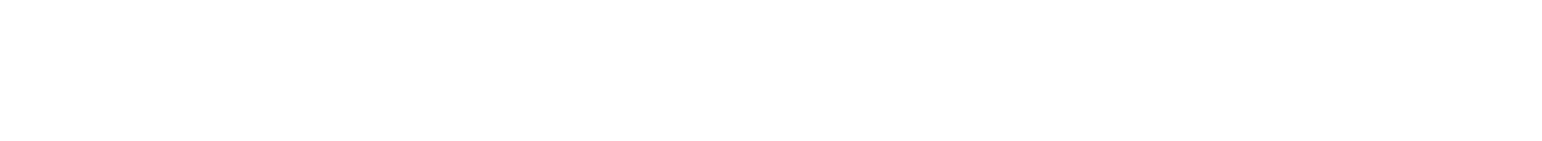

# **1- MASALA:** Quyidagi yo'naltirilmagan graf berilgan:

* # Tugunlar: A, B, C, D, E
* # Qirralar: A-B, A-C, B-D, C-D, D-E

# BFS algoritmi yordamida A tugunidan boshlab barcha tugunlarni aylab chiqing. Har bir tugun qaysi tartibda ko'rilganini va har bir tugunning A dan masofasini (qirralar soni) chiqaring.

In [4]:
# Kodni shu yerga yozing
from collections import deque

graph = {
    'A': ['B', 'C'],
    'B': ['A', 'D'],
    'C': ['A', 'D'],
    'D': ['B', 'C', 'E'],
    'E': ['D']
}

def bfs(graph, start):
    visited = []              # Ko‘rilgan tugunlar tartibi
    distance = {}             # Masofalar
    queue = deque([start])    # Navbat

    distance[start] = 0       # Start tugun masofasi 0

    while queue:
        node = queue.popleft()
        visited.append(node)

        for neighbor in graph[node]:
            if neighbor not in distance:
                queue.append(neighbor)
                distance[neighbor] = distance[node] + 1

    return visited, distance  # Funksiyadan chiqarish

visited, distance = bfs(graph, "A")
print("Ko'rilish tartibi:", visited)
print("Masofalar (A dan qirralar soni):", distance)

Ko'rilish tartibi: ['A', 'B', 'C', 'D', 'E']
Masofalar (A dan qirralar soni): {'A': 0, 'B': 1, 'C': 1, 'D': 2, 'E': 3}


# **2- MASALA:** Quyidagi yo'naltirilmagan graf berilgan:

* # Tugunlar: 1, 2, 3, 4, 5, 6
* # Qirralar: 1→2, 1→3, 2→4, 3→4, 4→5, 3→6

# BFS algoritmi yordamida 1-tugundan boshlab ko'rib chiqish tartibini aniqlang. 1-tugundan 5-tugunga eng qisqa yo'lni toping. Yo'ldagi tugunlarni ketma-ket chiqaring.

In [5]:
# Kodni shu yerga yozing
from collections import deque

graph = {
    1: [2, 3],
    2: [4],
    3: [4, 6],
    4: [5],
    5: [],
    6: []
}

def bfs_shortest_path(graph, start, goal):
    visited = []
    parent = {}
    queue = deque([start])
    parent[start] = None

    while queue:
        node = queue.popleft()
        visited.append(node)

        for neighbor in graph[node]:
            if neighbor not in parent:
                parent[neighbor] = node
                queue.append(neighbor)

    # Eng qisqa yo‘lni tiklash
    path = []
    current = goal
    while current is not None:
        path.append(current)
        current = parent[current]

    path.reverse()
    return visited, path

order, path = bfs_shortest_path(graph, 1, 5)

print("BFS tartibi:", order)
print("1 dan 5 gacha eng qisqa yo'l:", path)

BFS tartibi: [1, 2, 3, 4, 6, 5]
1 dan 5 gacha eng qisqa yo'l: [1, 2, 4, 5]


# **3- MASALA:** Quyidagi og'irliksiz yo'naltirilmagan graf berilgan:

* # Tugunlar: 0, 1, 2, 3, 4, 5, 6, 7
* # Qirralar: 0-1, 0-2, 1-3, 1-4, 2-5, 2-6, 5-7, 6-7

# BFS yordamida 0-tugundan boshlab daraxt (BFS tree) ni quring. Har bir tugunning chuqurligini hisoblang. Eng chuqur tugunni aniqlang.

In [ ]:
# Kodni shu yerga yozing
from collections import deque

graph = {
    0: [1, 2],
    1: [0, 3, 4],
    2: [0, 5, 6],
    3: [1],
    4: [1],
    5: [2, 7],
    6: [2, 7],
    7: [5, 6]
}

def bfs_tree(graph, start):
    queue = deque([start])
    depth = {start: 0}
    parent = {start: None}

    while queue:
        node = queue.popleft()

        for neighbor in graph[node]:
            if neighbor not in depth:
                depth[neighbor] = depth[node] + 1
                parent[neighbor] = node
                queue.append(neighbor)

    return parent, depth

parent, depth = bfs_tree(graph, 0)

print("BFS Tree (parent):", parent)
print("Depth:", depth)
print("Eng chuqur tugun:", max(depth, key=depth.get))


# **4- MASALA:** Quyidagi 5 × 5 o'lchamli labirint berilgan (0 — yo'l, 1 — devor):



```
0 0 1 0 0
0 1 1 0 1
0 0 0 0 1
1 1 0 1 0
0 0 0 0 0
```

# BFS yordamida (0,0) boshlanish nuqtasidan (4,4) tugash nuqtasiga eng qisqa yo'lni toping. Yo'ldagi barcha koordinatalarni chiqaring.

In [ ]:
# Kodni shu yerga yozing
from collections import deque

# Labirint
maze = [
    [0,0,1,0,0],
    [0,1,1,0,1],
    [0,0,0,0,1],
    [1,1,0,1,0],
    [0,0,0,0,0]
]

# Harakatlar: yuqoriga, pastga, chap, o'ng
moves = [(-1,0),(1,0),(0,-1),(0,1)]

def bfs_maze(maze, start, goal):
    rows, cols = len(maze), len(maze[0])
    queue = deque([start])
    parent = {start: None}

    while queue:
        x, y = queue.popleft()
        if (x, y) == goal:
            break

        for dx, dy in moves:
            nx, ny = x+dx, y+dy
            if 0 <= nx < rows and 0 <= ny < cols:
                if maze[nx][ny] == 0 and (nx, ny) not in parent:
                    parent[(nx, ny)] = (x, y)
                    queue.append((nx, ny))

    # Eng qisqa yo‘lni tiklash
    path = []
    current = goal
    while current:
        path.append(current)
        current = parent[current]
    path.reverse()
    return path

start = (0,0)
goal = (4,4)
path = bfs_maze(maze, start, goal)

print("Eng qisqa yo‘l koordinatalari:")
for p in path:
    print(p)

# **5- MASALA:** Quyidagi daraxt (tree) berilgan:



```
        1
       / \
      2   3
     / \   \
    4   5   6
   /         \
  7           8
```

# BFS yordamida daraxtni daraja-daraja aylab chiqing. Har bir darajadagi tugunlarni alohida qatorda chiqaring. Daraxtning balandligini (height) aniqlang.

In [6]:
# Kodni shu yerga yozing
from collections import deque

# 1️⃣ Daraxtni yaratish (adjacency list)
tree = {
    1: [2, 3],
    2: [4, 5],
    3: [6],
    4: [7],
    5: [],
    6: [8],
    7: [],
    8: []
}

# 2️⃣ BFS level-order traversal funksiyasi
def bfs_levels(tree, root):
    queue = deque([root])
    height = 0  # Daraxt balandligi
    print("Daraxtni daraja-daraja aylash:")

    while queue:
        level_size = len(queue)  # Hozirgi darajadagi tugunlar soni
        current_level = []

        for _ in range(level_size):
            node = queue.popleft()
            current_level.append(node)
            # Bolalarni queue ga qo‘shamiz
            for child in tree[node]:
                queue.append(child)

        # Hozirgi darajadagi tugunlarni chiqarish
        print("Daraja", height + 1, ":", current_level)
        height += 1

    print("Daraxt balandligi:", height)

# 3️⃣ Funksiyani chaqirish
bfs_levels(tree, 1)

Daraxtni daraja-daraja aylash:
Daraja 1 : [1]
Daraja 2 : [2, 3]
Daraja 3 : [4, 5, 6]
Daraja 4 : [7, 8]
Daraxt balandligi: 4


# **6- MASALA:** Quyidagi shahar xaritasi berilgan. Har bir shahar tugun, yo'llar qirralar hisoblanadi:

* # Shaharlar: Toshkent, Samarqand, Buxoro, Namangan, Andijon, Farg'ona,Qarshi, Termiz
* # Yo'llar: Toshkent-Samarqand, Toshkent-Namangan, Samarqand-Buxoro, Samarqand-Qarshi, Namangan-Andijon, Andijon-Farg'ona, Buxoro-Termiz, Qarshi-Termiz

# BFS yordamida Toshkentdan Termizga eng kam shahar orqali o'tadigan yo'lni toping. Yo'ldagi barcha shaharlarni va nechta shahar orqali o'tilganini chiqaring.


In [7]:
# Kodni shu yerga yozing
from collections import deque

# 1️⃣ Shahar xaritasi (graf)
graph = {
    "Toshkent": ["Samarqand", "Namangan"],
    "Samarqand": ["Toshkent", "Buxoro", "Qarshi"],
    "Buxoro": ["Samarqand", "Termiz"],
    "Namangan": ["Toshkent", "Andijon"],
    "Andijon": ["Namangan", "Farg'ona"],
    "Farg'ona": ["Andijon"],
    "Qarshi": ["Samarqand", "Termiz"],
    "Termiz": ["Buxoro", "Qarshi"]
}

# 2️⃣ BFS yordamida eng qisqa yo'l topish
def bfs_shortest_path(graph, start, goal):
    queue = deque([start])
    visited = set([start])
    predecessor = {start: None}  # Yo‘lni tiklash uchun

    while queue:
        node = queue.popleft()
        if node == goal:
            break  # Maqsadga yetdik
        for neighbor in graph[node]:
            if neighbor not in visited:
                visited.add(neighbor)
                queue.append(neighbor)
                predecessor[neighbor] = node

    # Yo‘lni tiklash
    path = []
    current = goal
    while current is not None:
        path.append(current)
        current = predecessor[current]
    path.reverse()

    return path

# 3️⃣ Funksiyani chaqirish
path = bfs_shortest_path(graph, "Toshkent", "Termiz")

# 4️⃣ Natijalarni chiqarish
print("Toshkentdan Termizga eng qisqa yo'l:", path)
print("O‘tilgan shaharlar soni:", len(path))

Toshkentdan Termizga eng qisqa yo'l: ['Toshkent', 'Samarqand', 'Buxoro', 'Termiz']
O‘tilgan shaharlar soni: 4


# **7- MASALA:** Quyidagi 6 × 6 o'lchamli labirint berilgan (0 — yo'l, 1 — devor, 2 — boshlash, 3 — maqsad):i:

```
2 0 1 0 0 0
1 0 1 0 1 0
0 0 0 0 1 0
0 1 1 0 0 0
0 0 0 1 0 3
0 1 0 0 0 0
```

# BFS yordamida 2 belgili nuqtadan 3 belgili nuqtaga eng qisqa yo'lni toping. Yo'l uzunligini va barcha koordinatalarni chiqaring. Agar yo'l topilmasa "Yo'l mavjud emas" deb chiqaring.

In [8]:
# Kodni shu yerga yozing
from collections import deque

labirint = [
    [2, 0, 1, 0, 0, 0],
    [1, 0, 1, 0, 1, 0],
    [0, 0, 0, 0, 1, 0],
    [0, 1, 1, 0, 0, 0],
    [0, 0, 0, 1, 0, 3],
    [0, 1, 0, 0, 0, 0]
]

def bfs_labirint(labirint):
    start, goal = (0, 0), (4, 5)

    def qoshni(pos):
        i, j = pos
        natija = []
        for di, dj in [(0,1),(1,0),(0,-1),(-1,0)]:
            ni, nj = i+di, j+dj
            if 0 <= ni < 6 and 0 <= nj < 6 and labirint[ni][nj] != 1:
                natija.append((ni, nj))
        return natija


    queue = deque([(start, [start])])
    visited = {start}

    while queue:
        tugun, yol = queue.popleft()

        if tugun == goal:
            return yol

        for q in qoshni(tugun):
            if q not in visited:
                visited.add(q)
                queue.append((q, yol + [q]))

    return None


yol = bfs_labirint(labirint)
if yol:
    print(f"Yo'l: {yol}")
    print(f"Qadam: {len(yol)-1}")
else:
    print("Yo'l mavjud emas")

Yo'l: [(0, 0), (0, 1), (1, 1), (2, 1), (2, 2), (2, 3), (3, 3), (3, 4), (3, 5), (4, 5)]
Qadam: 9


# **8-MASALA:** Ijtimoiy tarmoq simulyatsiyasi. Foydalanuvchilar va ularning do'stlari:

* # Ali: Vali, Soli, Hasan
* # Vali: Ali, Nozima, Kamol
* # Soli: Ali, Kamol, Zilola
* # Hasan: Ali, Zilola
* # Nozima: Vali, Kamol
* # Kamol: Vali, Soli, Nozima, Jasur
* # Zilola: Soli, Hasan
* # Jasur: Kamol

#BFS yordamida Ali va Jasur orasidagi "do'stlik masofasini" toping. Ular orasidagi eng qisqa do'stlik zanjirini chiqaring. Ali ning 1-darajali, 2-darajali va 3-darajali do'stlarini aniqlang.


In [9]:
# Kodni shu yerga yozing
from collections import deque

# 1️⃣ Ijtimoiy tarmoq grafi
network = {
    "Ali": ["Vali", "Soli", "Hasan"],
    "Vali": ["Ali", "Nozima", "Kamol"],
    "Soli": ["Ali", "Kamol", "Zilola"],
    "Hasan": ["Ali", "Zilola"],
    "Nozima": ["Vali", "Kamol"],
    "Kamol": ["Vali", "Soli", "Nozima", "Jasur"],
    "Zilola": ["Soli", "Hasan"],
    "Jasur": ["Kamol"]
}

# 2️⃣ BFS yordamida eng qisqa do'stlik zanjirini topish
def bfs_friendship(network, start, goal):
    queue = deque([start])
    visited = set([start])
    predecessor = {start: None}  # Yo‘lni tiklash uchun
    level = {start: 0}           # Do‘stlik darajasi

    while queue:
        user = queue.popleft()
        if user == goal:
            break
        for friend in network[user]:
            if friend not in visited:
                visited.add(friend)
                queue.append(friend)
                predecessor[friend] = user
                level[friend] = level[user] + 1

    # Eng qisqa yo‘lni tiklash
    path = []
    current = goal
    while current:
        path.append(current)
        current = predecessor[current]
    path.reverse()  # Start → Goal ko‘rinishida

    return path, level

# 3️⃣ Funksiyani chaqirish
path, level = bfs_friendship(network, "Ali", "Jasur")

# 4️⃣ Natijalarni chiqarish
print("Ali va Jasur orasidagi eng qisqa do'stlik zanjiri:", path)
print("Do'stlik masofasi (necha do'st orqali):", len(path)-1)

# Ali ning do'stlik darajalari
friends_1 = [u for u, l in level.items() if l == 1]
friends_2 = [u for u, l in level.items() if l == 2]
friends_3 = [u for u, l in level.items() if l == 3]

print("Ali ning 1-darajali do'stlari:", friends_1)
print("Ali ning 2-darajali do'stlari:", friends_2)
print("Ali ning 3-darajali do'stlari:", friends_3)

Ali va Jasur orasidagi eng qisqa do'stlik zanjiri: ['Ali', 'Vali', 'Kamol', 'Jasur']
Do'stlik masofasi (necha do'st orqali): 3
Ali ning 1-darajali do'stlari: ['Vali', 'Soli', 'Hasan']
Ali ning 2-darajali do'stlari: ['Nozima', 'Kamol', 'Zilola']
Ali ning 3-darajali do'stlari: ['Jasur']


# **9-MASALA:** Quyidagi metro tarmog'i berilgan. Har bir bekat tugun, izlar qirralar:

* # Chilonzor liniyasi: Buyuk Ipak Yo'li → Alisher Navoiy → Pakhtakor → Mustaqillik Maydoni → Ming O'rik

* # O'zbekiston liniyasi: Dustlik → Tinchlik → O'zbekiston → Alisher Navoiy → Hamid Olimjon

* # Yunusobod liniyasi: Yunusobod → Minor → Pushkin → Alisher Navoiy


# Alisher Navoiy — uchta liniya kesishgan bekat. BFS yordamida Buyuk Ipak Yo'lidan Yunusobodga eng kam bekat orqali borishni toping. Yo'ldagi barcha bekatlarni chiqaring.

In [10]:
# Kodni shu yerga yozing
from collections import deque

# 1️⃣ Metro tarmog'i grafi
metro = {
    # Chilonzor liniyasi
    "Buyuk Ipak Yo'li": ["Alisher Navoiy"],
    "Alisher Navoiy": ["Buyuk Ipak Yo'li", "Pakhtakor", "O'zbekiston", "Pushkin"],
    "Pakhtakor": ["Alisher Navoiy", "Mustaqillik Maydoni"],
    "Mustaqillik Maydoni": ["Pakhtakor", "Ming O'rik"],
    "Ming O'rik": ["Mustaqillik Maydoni"],

    # O'zbekiston liniyasi
    "Dustlik": ["Tinchlik"],
    "Tinchlik": ["Dustlik", "O'zbekiston"],
    "O'zbekiston": ["Tinchlik", "Alisher Navoiy"],
    "Hamid Olimjon": ["Alisher Navoiy"],

    # Yunusobod liniyasi
    "Yunusobod": ["Minor"],
    "Minor": ["Yunusobod", "Pushkin"],
    "Pushkin": ["Minor", "Alisher Navoiy"]
}

# 2️⃣ BFS yordamida eng qisqa yo'l topish
def bfs_shortest_path(graph, start, goal):
    queue = deque([start])
    visited = set([start])
    pred = {start: None}

    while queue:
        node = queue.popleft()
        if node == goal:
            break
        for neighbor in graph[node]:
            if neighbor not in visited:
                visited.add(neighbor)
                queue.append(neighbor)
                pred[neighbor] = node

    # Yo'lni tiklash
    path = []
    current = goal
    while current:
        path.append(current)
        current = pred[current]
    path.reverse()
    return path

# 3️⃣ Funksiyani chaqirish
path = bfs_shortest_path(metro, "Buyuk Ipak Yo'li", "Yunusobod")

# 4️⃣ Natijalarni chiqarish
print("Buyuk Ipak Yo'lidan Yunusobodga eng qisqa yo'l:", path)
print("O‘tilgan bekatlar soni:", len(path))

Buyuk Ipak Yo'lidan Yunusobodga eng qisqa yo'l: ["Buyuk Ipak Yo'li", 'Alisher Navoiy', 'Pushkin', 'Minor', 'Yunusobod']
O‘tilgan bekatlar soni: 5


# **10-MASALA:** Quyidagi elektr zanjiri grafи berilgan. Har bir tugun elektr stantsiyasi, qirralar esa uzatish liniyalari:

* # Stantsiyalar: S1, S2, S3, S4, S5, S6, S7, S8
* # Liniyalar: S1-S2, S1-S3, S2-S4, S2-S5, S3-S5, S3-S6, S4-S7, S5-S7, S6-S8, S7-S8

# S3 stantsiyasi ishdan chiqdi va graf dan olib tashlandi. BFS yordamida S1 dan S8 ga elektr uzatish mumkinmi yoki yo'qligini aniqlang. Mumkin bo'lsa eng qisqa yo'lni, mumkin bo'lmasa sababini chiqaring.

In [11]:
# Kodni shu yerga yozing
from collections import deque

# 1️⃣ Elektr zanjiri grafi
graph = {
    "S1": ["S2", "S3"],
    "S2": ["S1", "S4", "S5"],
    "S3": ["S1", "S5", "S6"],
    "S4": ["S2", "S7"],
    "S5": ["S2", "S3", "S7"],
    "S6": ["S3", "S8"],
    "S7": ["S4", "S5", "S8"],
    "S8": ["S6", "S7"]
}

# 2️⃣ S3 stantsiyasini olib tashlaymiz
graph.pop("S3")  # S3 ni o'chiramiz
for neighbors in graph.values():
    if "S3" in neighbors:
        neighbors.remove("S3")

# 3️⃣ BFS yordamida S1 → S8 yo‘lni topish
def bfs_shortest_path(graph, start, goal):
    queue = deque([start])
    visited = set([start])
    pred = {start: None}

    while queue:
        node = queue.popleft()
        if node == goal:
            break
        for neighbor in graph[node]:
            if neighbor not in visited:
                visited.add(neighbor)
                queue.append(neighbor)
                pred[neighbor] = node

    # Yo‘lni tiklash
    path = []
    current = goal
    while current:
        path.append(current)
        current = pred[current]
    path.reverse()

    # Agar start dan goal ga yetish mumkin bo'lmasa
    if path[0] != start:
        return None
    return path

# 4️⃣ Funksiyani chaqirish
path = bfs_shortest_path(graph, "S1", "S8")

# 5️⃣ Natijani chiqarish
if path:
    print("S1 dan S8 ga elektr uzatish mumkin.")
    print("Eng qisqa yo‘l:", path)
    print("O‘tgan stantsiyalar soni:", len(path))
else:
    print("S1 dan S8 ga elektr uzatish mumkin emas.")
    print("Sabab: S3 stantsiyasi ishdan chiqqani sababli uzatish zanjiri uzildi.")

S1 dan S8 ga elektr uzatish mumkin.
Eng qisqa yo‘l: ['S1', 'S2', 'S4', 'S7', 'S8']
O‘tgan stantsiyalar soni: 5


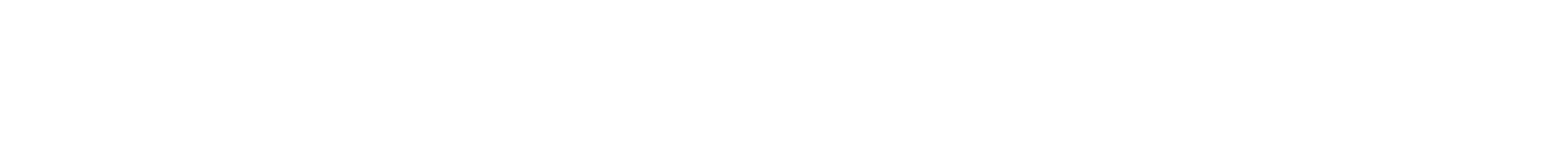

# **11-MASALA:** Quyidagi yo'naltirilmagan graf berilgan:

* # Tugunlar: A, B, C, D, E, F
* # Qirralar: A-B, A-C, B-D, B-E, C-F, D-F8

# DFS algoritmi yordamida A tugunidan boshlab barcha tugunlarni aylab chiqing. Rekursiv va iterativ usulda bajaring. Har ikki usul natijalarini solishtiring.

In [ ]:
# Kodni shu yerga yozing


# **12-MASALA:** Quyidagi yo'naltirilgan graf berilgan:

* # Tugunlar: 1, 2, 3, 4, 5, 6, 7
* # Qirralar: 1→2, 1→3, 2→4, 2→5, 3→6, 4→7, 5→7, 6→7

# DFS yordamida 1-tugundan boshlab ko'rib chiqish tartibini aniqlang. Har bir tugunning kirish va chiqish vaqtini hisoblang. Natijani chiqaring.

In [ ]:
# Kodni shu yerga yozing


# **13-MASALA:** Quyidagi so'z qidirish masalasi berilgan. 4 × 4 o'lchamli harf taxtasi:

```
A B C D
E F G H
I J K L
M N O P
```
# DFS yordamida "BFKP" so'zini taxtada toping. Faqat qo'shni harflarga (4 tomon: yuqori, pastki, chap, o'ng) o'tish mumkin. Topilgan so'zning koordinatalarini chiqaring.

In [ ]:
# Kodni shu yerga yozing


# **14-MASALA:** Quyidagi neft quvurlari tarmog'i berilgan. Har bir tugun pompalash stantsiyasi, qirralar esa quvurlar:

* # Stantsiyalar: S1, S2, S3, S4, S5, S6, S7, S8, S9
* # Quvurlar: S1→S2, S1→S3, S2→S4, S2→S5, S3→S5, S3→S6, S4→S7, S5→S7, S5→S8, S6→S8, S7→S9, S8→S9

# S5 stantsiyasi ishdan chiqdi. DFS yordamida S1 dan S9 ga neft yetkazib berish mumkin bo'lgan barcha alternativ yo'llarni toping. Har bir yo'lni va uzunligini chiqaring.

In [ ]:
# Kodni shu yerga yozing


# **15-MASALA:** Quyidagi 7 × 7 o'lchamli suv ombori xaritasi berilgan (0 — quruqlik, 1 — suv, -1 — botqoq):

```
0  1  1  0 -1  0  0
 0  1  0  0  0  0  1
-1  1  1  1  0  1  1
 0  0  0  1 -1  1  0
 0 -1  0  1  1  1  0
 0  0  0  0  0  1  1
 0  0 -1  0  0  0  1
```
# DFS yordamida barcha alohida suv havzalarini (1 lar bilan bog'langan hududlar) toping. Botqoqdan (-1) o'tib bo'lmaydi. Har bir havzaning maydonini (katak soni) va koordinatalarini chiqaring. Eng katta havzani aniqlang.

In [ ]:
# Kodni shu yerga yozing


# **16-MASALA:** Quyidagi neft quvurlari tarmog'i berilgan. Har bir tugun pompalash stantsiyasi, qirralar esa quvurlar:

* # Matematika → Fizika
* # Matematika → Dasturlash
* # Fizika → Elektronika
* # Dasturlash → Algoritm
* # Dasturlash → Ma'lumotlar bazasi
* # Elektronika → Robototexnika
* # Algoritm → Sun'iy intellekt
* # Ma'lumotlar bazasi → Sun'iy intellekt
* # Robototexnika → Sun'iy intellekt


# DFS yordamida topologik tartibni aniqlang. Sikl borligini tekshiring. Sun'iy intellekt fanini o'qish uchun qanday tartibda fanlarni o'tish kerakligini chiqaring.

In [ ]:
# Kodni shu yerga yozing


# **17-MASALA:** Quyidagi 6 × 6 o'lchamli qal'a xaritasi berilgan:

* # 0 — bo'sh yo'l
* # 1 — devor
* # 2 — boshlash nuqtasi (qahramon)
* # 3 — xazina
* # 4 — dushman (shu katakka kirish mumkin emas)

```
2 0 1 0 4 0
0 0 1 0 0 0
0 1 1 1 0 1
0 0 0 0 0 0
1 1 0 1 1 0
0 4 0 0 0 3
```

# DFS yordamida qahramondan xazinaga barcha mumkin bo'lgan yo'llarni toping. Dushmanlar va devorlardan o'tib bo'lmaydi. Eng qisqa va eng uzun yo'lni aniqlang. Har bir yo'ldagi koordinatalarni chiqaring.

In [ ]:
# Kodni shu yerga yozing


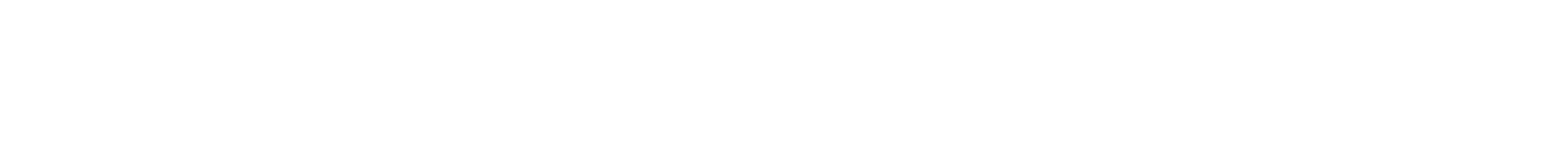

# **18-MASALA:** Quyidagi shahar avtobus tarmog'i berilgan. Har bir tugun bekat, qirralar esa yo'nalishlar, og'irliklar esa daqiqalarda vaqt:

* # **Bekatlar: Uy, Bozor, Maktab, Shifoxona, Park, Do'kon, Ish**
* # **Yo'nalishlar:**
  * # Uy → Bozor: 5 daqiqa
  * # Uy → Park: 10 daqiqa
  * # Bozor → Maktab: 8 daqiqa
  * # Bozor → Do'kon: 3 daqiqa
  * # Park → Do'kon: 4 daqiqa
  * # Park → Shifoxona: 7 daqiqa
  * # Maktab → Ish: 6 daqiqa
  * # Do'kon → Shifoxona: 5 daqiqa
  * # Do'kon → Ish: 9 daqiqa
  * # Shifoxona → Ish: 4 daqiqa

# Dijkstra algoritmi yordamida Uydan Ishga eng kam vaqtda yetib borish yo'lini toping. Yo'ldagi barcha bekatlarni va umumiy vaqtni chiqaring.

In [ ]:
# Kodni shu yerga yozing


# **19-MASALA:** Quyidagi turistik joylar xaritasi berilgan. Og'irliklar yo'l narxi (ming so'm):

* # **Joylar: Mehmonxona, Registon, Bibi-Xonim, Shohizinda, Ulug'bek Rasadxonasi, Afrosiyob Muzeyi, Bozor**
* # **Yo'llar:**
  * # Mehmonxona → Registon: 15 ming
  * # Mehmonxona → Bozor: 8 ming
  * # Registon → Bibi-Xonim: 10 ming
  * # Registon → Shohizinda: 12 ming
  * # Bibi-Xonim → Shohizinda: 5 ming
  * # Bibi-Xonim → Afrosiyob: 18 ming
  * # Shohizinda → Afrosiyob: 9 ming
  * # Bozor → Registon: 11 ming
  * # Bozor → Ulug'bek: 20 ming
  * # Ulug'bek → Afrosiyob: 7 ming

# Dijkstra algoritmi yordamida Mehmonxonadan Afrosiyob Muzeyiga eng arzon yo'lni toping. Yo'ldagi barcha joylarni va umumiy xarajatni chiqaring.

In [ ]:
# Kodni shu yerga yozing


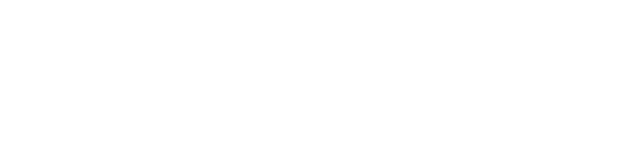

# **20-MASALA:** Quyidagi 6 × 6 o'lchamli labirint berilgan (0 — yo'l, 1 — devor, S — boshlash, G — maqsad):

```
S 0 1 0 0 0
0 0 1 0 1 0
0 0 0 0 1 0
1 1 0 1 0 0
0 0 0 1 0 1
0 1 0 0 0 G
```

# Heuristika sifatida Manhattan masofasidan foydalaning: h(n) = |x1 - x2| + |y1 - y2|

# A* algoritmi yordamida S dan G ga eng qisqa yo'lni toping. Har bir katak uchun f, g, h qiymatlarini hisoblang. Yo'ldagi barcha koordinatalarni chiqaring.

In [ ]:
# Kodni shu yerga yozing


# **19-MASALA:** Quyidagi shahar ko'chalari xaritasi berilgan. Har bir tugun chorraha, og'irliklar vaqt (daqiqa). Heuristika sifatida manzilgacha taxminiy vaqt berilgan:

* # **Chorrahalar: Uy, A, B, C, D, E, Ish**
* # **Yo'llar:**
  * # Uy → A: 5 daqiqa
  * # Uy → B: 8 daqiqa
  * # A → C: 6 daqiqa
  * # A → D: 10 daqiqa
  * # B → D: 4 daqiqa
  * # B → E: 7 daqiqa
  * # C → Ish: 9 daqiqa
  * # D → Ish: 5 daqiqa
  * # E → Ish: 6 daqiqa
* # **Heuristika (Ishgacha taxminiy vaqt):**
  * # Uy: 15, A: 10, B: 11, C: 9, D: 5, E: 6, Ish: 0

# A* algoritmi yordamida Uydan Ishga eng tez yetib borish yo'lini toping. Har bir qadamda f(n) = g(n) + h(n) qiymatini hisoblang. Dijkstra bilan solishtiring — A* nechta kam tugun ko'rishini chiqaring.

In [ ]:
# Kodni shu yerga yozing


# **🚀 GitHub akkountingizni yozing.**

## ...................